<a href="https://colab.research.google.com/github/thomaziogiacobbe/cnc/blob/main/Relatorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resoluções de Sistemas de Equações Lineares

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Métodos

#### Eliminacao Gauss

##### Sem pivotamento

In [ ]:
def gauss_sem_pivotamento(A, b):
    U = np.append(A, b, axis=1)
    n = U.shape[0]

    for i in range(n):
        for j in range(i + 1, n):
            f = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * f

    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            f = U[j,i] / U[i,i]

            for k in range(n + 1):
                U[j,k] -= U[i,k] * f

    for i in range(n):
        U[i,n] /= U[i,i]
        U[i,i] /= U[i,i]

    return U[:,n:n+1]

##### Com pivotamento

In [ ]:
def gauss_com_pivotamento(A, b):
    n = len(A)

    for k in range(n - 1):
        max_idx = abs(A[k:, k]).argmax() + k
        if max_idx != k:
            A[[k, max_idx]] = A[[max_idx, k]]
            b[[k, max_idx]] = b[[max_idx, k]]

        for j in range(k + 1, n):
            m = A[j, k] / A[k, k]
            A[j, k:] -= m * A[k, k:]
            b[j] -= m * b[k]

    x = np.zeros(n)
    for k in range(n - 1, -1, -1):
        x[k] = (b[k] - np.dot(A[k, k+1:], x[k+1:])) / A[k, k]
    return x

#### Fatoracao LU

In [ ]:
def lu(A):
    size = len(A)

    L = [[0 for _ in range(size)] for _ in range(size)]
    U = [[0 for _ in range(size)] for _ in range(size)]

    for j in range(size):
        L[j][j] = 1

        for i in range(j + 1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = A[i][j] - s1

        for i in range(j, size):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (A[i][j] - s2) / U[j][j]

    return L, U

In [ ]:
def solve(L, U, B, r):
    size = len(B)
    y = [0 for _ in range(size)]
    x = [0 for _ in range(size)]
    for _i in range(size):
        y[_i] = B[_i]
        temp_sum = sum(L[_i][_k] * y[_k] for _k in range(_i))
        y[_i] -= temp_sum
    for _i in range(size-1, -1, -1):
        temp_sum = sum(U[_i][_k] * x[_k] for _k in range(_i+1, size))
        try:
            x[_i] = round(((y[_i] - temp_sum) / U[_i][_i]), r)

        except ZeroDivisionError:
            pass
    return x

#### Cholesky

In [ ]:
def cholesky(A):
    n = len(A)
    L = np.zeros((n, n), dtype='float64')

    for i in range(n):
        for k in range(i+1):
            su = sum(L[i, j] * L[k, j] for j in range(k))

            if (i == k):
                L[i, k] = math.sqrt(A[i, i] - su)
            else:
                L[i, k] = (1.0 / L[k, k] * (A[i, k] - su))
    return L

In [ ]:
def sub(L,LT,B):

    y = np.zeros(B.size)
    for m, b in enumerate(B.flatten()):
        y[m] = b
        if m:
            for n in range(m):
                y[m] -= y[n] * L[m,n]
        y[m] /= L[m, m]

    x = np.zeros(B.size)
    lastidx = B.size - 1
    for midx in range(B.size):
        m = B.size - 1 - midx
        x[m] = y[m]
        if midx:
            for nidx in range(midx):
                n = B.size - 1  - nidx
                x[m] -= x[n] * LT[m,n]
        x[m] /= LT[m, m]
    return x

#### Gauss-Jacobi

In [ ]:
def gauss_jacobi(A, b, iter_max, tol, x=None):
    n = len(A)
    list = []

    if x is None:
        x = np.zeros(len(A[0]))

    v = np.zeros(len(A[0]))

    for iter in range(iter_max):
        for i in range(n):
            sum = 0
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x[j]
            v[i] = (b[i] - sum) / A[i, i]
        norma_nun, norma_den = 0, 0
        for i in range(n):
            t = abs(v[i] - x[i])
            if t > norma_nun: norma_nun = t
            if abs(v[i]) > norma_den: norma_den = abs(v[i])
            x[i] = v[i]
        norma_rel = norma_nun / norma_den
        list.append(x.tolist())
        if norma_rel <= tol: break
    return [list, len(list)]

#### Gauss-Seidel

In [ ]:
def gauss_seidel(A, b, iter_max, tol, x=None):
    n = len(A)
    list = []

    if x is None:
        x = np.zeros(len(A[0]))

    v = np.zeros(len(A[0]))

    for iter in range(iter_max):
        norma_nun, norma_den = 0, 0
        for i in range(n):
            sum = 0
            for j in range(n):
                if i != j:
                    sum += A[i, j] * x[j]
            v[i] = x[i]
            x[i] = (b[i] - sum) / A[i, i]
            t = abs(v[i] - x[i])

            if t > norma_nun: norma_nun = t
            if abs(x[i]) > norma_den: norma_den = abs(x[i])

            norma_rel = norma_nun / norma_den
            list.append(x.tolist())
            if norma_rel <= tol: break
    return [list, len(list)]

## Relatorio 2

### 1

#### a

In [ ]:
A = np.array([[1, 1, -1],
              [-0.001, 3.333, 0],
              [0, -3.333, 4.002]], dtype='float64')
B = np.array([[0], [2], [10]], dtype='float64')

print(gauss_sem_pivotamento(A, B))

[[2.39832046]
 [0.60077957]
 [2.99910003]]


#### b

In [ ]:
A = np.array([[1, 1, -1],
              [-0.001, 3.333, 0],
              [0, -3.333, 4.002]], dtype='float64')
B = np.array([[0], [2], [10]], dtype='float64')

print(gauss_com_pivotamento(A, B))

[2.39832046 0.60077957 2.99910003]


Não, o resultado é exatamente igual

### 2

In [ ]:
A = np.array([[6, 15, 55],
              [15, 55, 225],
              [55, 225, 979]], dtype='float64')
L, U = lu(A)

print("L:", L)
print("U:", U)

B = np.array([152.6, 585.6, 2488.8], dtype='float64')
print("Solução:", solve(L, U, B, 5))

L: [[1.0, 0, 0], [2.5, 1.0, 0], [9.166666666666666, 5.0, 1.0]]
U: [[6.0, 15.0, 55.0], [0, 17.5, 87.5], [0, 0, 37.33333333333337]]
Solução: [2.47855, 2.35931, 1.86071]


### 3

In [ ]:
A = np.array([[8, 20, 15],
              [20, 80, 50],
              [15, 50, 60]], dtype='float64')

G = cholesky(A)
GT = G.T

print("G:", G)
print("GT:", GT)

B = np.array([50, 250, 100], dtype='float64')
print("Solução:", sub(G, GT, B))

G: [[2.82842712 0.         0.        ]
 [7.07106781 5.47722558 0.        ]
 [5.30330086 2.28217732 5.16397779]]
GT: [[2.82842712 7.07106781 5.30330086]
 [0.         5.47722558 2.28217732]
 [0.         0.         5.16397779]]
Solução: [-2.734375   4.8828125 -1.71875  ]


### 4

In [ ]:
A = np.array([[10, 2, -3, 5],
              [1, 8, 1, 2],
              [2, -1, 5, 1],
              [-1, 2, 3, 20]], dtype='float64')
B = np.array([48, 4, -11, 150], dtype='float64')

In [ ]:
r, s = gauss_jacobi(A, B, 10, 0.001)
print("r:", r)
print(s)

r: [[25.433333333333334, 10.647272727272728, 2.542185903983657], [-24.48821927136535, -6.688942334478597, -1.3336769121243073], [54.38106086400264, 22.781828987244534, 5.455223784660652], [-81.52745716083399, -26.500750263794295, -5.748794555311711], [144.38249241650973, 56.3998296792299, 13.212950922573631], [-236.68495765499972, -82.78275170594023, -18.531357263263295], [402.26098751143076, 151.00781361925888, 34.86475158821403], [-671.6797569401091, -241.68879854581124, -54.762321121003], [1131.6432733070558, 417.86033829686016, 95.82345894230187], [-1897.5992193799175, -689.9877702113412, -157.06859667893934]]
10


In [ ]:
r, s = gauss_seidel(A, B, 10, 0.001)
print(r)
print(s)

[[4.8, 0.0, 0.0, 0.0], [4.8, -0.09999999999999998, 0.0, 0.0], [4.8, -0.09999999999999998, -4.14, 0.0], [4.8, -0.09999999999999998, -4.14, 8.370999999999999], [-0.6074999999999988, -0.09999999999999998, -4.14, 8.370999999999999], [-0.6074999999999988, -0.9993124999999998, -4.14, 8.370999999999999], [-0.6074999999999988, -0.9993124999999998, -3.8310625000000003, 8.370999999999999], [-0.6074999999999988, -0.9993124999999998, -3.8310625000000003, 8.144215625], [-0.22156406249999988, -0.9993124999999998, -3.8310625000000003, 8.144215625], [-0.22156406249999988, -1.0294755859374998, -3.8310625000000003, 8.144215625], [-0.22156406249999988, -1.0294755859374998, -3.9461126171874996, 8.144215625], [-0.22156406249999988, -1.0294755859374998, -3.9461126171874996, 8.183786248046875], [-0.269831791992187, -1.0294755859374998, -3.9461126171874996, 8.183786248046875], [-0.269831791992187, -1.0189535108642578, -3.9461126171874996, 8.183786248046875], [-0.269831791992187, -1.0189535108642578, -3.932615

### 5

#### a

[-1.5, -1.75002500250025, -2.0000500050005, -2.25007500750075, -2.500100010001, -2.75012501250125, -3.0001500150015, -3.25017501750175, -3.500200020002, -3.75022502250225, -4.0002500250025, -4.25027502750275, -4.500300030003, -4.75032503250325, -5.0003500350035, -5.25037503750375, -5.500400040004, -5.75042504250425, -6.0004500450045, -6.25047504750475, -6.500500050005, -6.7505250525052505, -7.000550055005499, -7.25057505750575, -7.5006000600060005, -7.75062506250625, -8.0006500650065, -8.250675067506752, -8.500700070007, -8.750725072507251, -9.0007500750075, -9.25077507750775, -9.500800080008, -9.75082508250825, -10.0008500850085, -10.250875087508751, -10.500900090009, -10.75092509250925, -11.0009500950095, -11.250975097509752, -11.50100010001, -11.75102510251025, -12.001050105010501, -12.25107510751075, -12.501100110010999, -12.75112511251125, -13.0011501150115, -13.25117511751175, -13.501200120012001, -13.75122512251225, -14.0012501250125, -14.251275127512752, -14.501300130013, -14.7

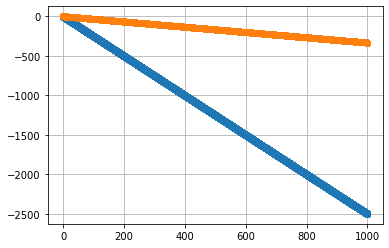

In [ ]:
eq1 = lambda x2: (-3 - 5*x2) / 2
eq2 = lambda x2: (2 - x2) / 3

curva = np.linspace(0, 1000, 10000)
valores = [eq1(valor) for valor in curva]
valores2 = [eq2(valor) for valor in curva]
plt.plot(curva, valores, linestyle='-', marker='o')
plt.plot(curva, valores2, linestyle='-', marker='o')
plt.grid()
plt.show()

In [ ]:
A = np.array([[2, 5],
              [3, 1]], dtype='float64')
B = np.array([-3 , 2], dtype='float64')

r, s =gauss_jacobi(A, B, 20, 0.001)
print(r)
print(s)

r, s = gauss_seidel(A, B, 20, 0.001)
print(r)
print(s)

[[-1.5, 2.0], [-6.5, 6.5], [-17.75, 21.5], [-55.25, 55.25], [-139.625, 167.75], [-420.875, 420.875], [-1053.6875, 1264.625], [-3163.0625, 3163.0625], [-7909.15625, 9491.1875], [-23729.46875, 23729.46875], [-59325.171875, 71190.40625], [-177977.515625, 177977.515625], [-444945.2890625, 533934.546875], [-1334837.8671875, 1334837.8671875], [-3337096.16796875, 4004515.6015625], [-10011290.50390625, 10011290.50390625], [-25028227.759765625, 30033873.51171875], [-75084685.27929688, 75084685.27929688], [-187711714.6982422, 225254057.83789062], [-563135146.0947266, 563135146.0947266]]
20
[[-1.5, 0.0], [-1.5, 6.5], [-17.75, 6.5], [-17.75, 55.25], [-139.625, 55.25], [-139.625, 420.875], [-1053.6875, 420.875], [-1053.6875, 3163.0625], [-7909.15625, 3163.0625], [-7909.15625, 23729.46875], [-59325.171875, 23729.46875], [-59325.171875, 177977.515625], [-444945.2890625, 177977.515625], [-444945.2890625, 1334837.8671875], [-3337096.16796875, 1334837.8671875], [-3337096.16796875, 10011290.50390625], [-

#### b

In [ ]:
A = np.array([[3, 1],
              [2, 5]], dtype='float64')
B = np.array([2, -3], dtype='float64')

r, s =gauss_jacobi(A, B, 20, 0.001)
print(r)
print(s)

r, s = gauss_seidel(A, B, 20, 0.001)
print(r)
print(s)

[[0.6666666666666666, -0.6], [0.8666666666666667, -0.8666666666666666], [0.9555555555555556, -0.9466666666666667], [0.9822222222222222, -0.9822222222222223], [0.994074074074074, -0.9928888888888888], [0.9976296296296296, -0.9976296296296295], [0.9992098765432099, -0.9990518518518519], [0.999683950617284, -0.999683950617284]]
8
[[0.6666666666666666, 0.0], [0.6666666666666666, -0.8666666666666666], [0.9555555555555556, -0.8666666666666666], [0.9555555555555556, -0.9822222222222223], [0.994074074074074, -0.9822222222222223], [0.994074074074074, -0.9976296296296295], [0.9992098765432099, -0.9976296296296295], [0.9992098765432099, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.9998946502057614, -0.999683950617284], [0.999894